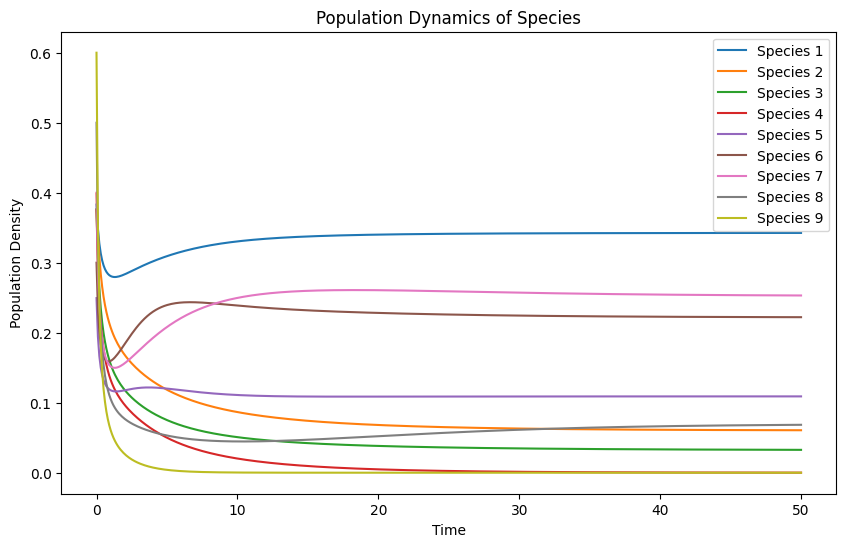

In [6]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# Define the number of species
m = 9

# Define the interaction matrix A (m x m)
A = np.array([[-1.96501146, -0.70814782, -0.29090474, -0.51082761, -0.89294695, -0.1, -0.2, -0.3, -0.4],
              [-0.89629309, -1.53979887, -0.20724288, -0.0514672 , -0.44080984, -0.5, -0.6, -0.7, -0.8],
              [-0.02987621, -0.45683322, -2.06335761, -0.27848728, -0.6762549 , -0.9, -1.0, -1.1, -1.2],
              [-0.59086282, -0.02398188, -0.55885409, -1.67346601, -0.4151012 , -1.3, -1.4, -1.5, -1.6],
              [-0.28352508, -0.69313792, -0.44045372, -0.15686774, -1.95886258, -1.7, -1.8, -1.9, -2.0],
              [-0.1, -0.2, -0.3, -0.4, -0.5, -2.1, -2.2, -2.3, -2.4],
              [-0.5, -0.6, -0.7, -0.8, -0.9, -1.0, -2.5, -2.6, -2.7],
              [-1.1, -1.2, -1.3, -1.4, -1.5, -1.6, -1.7, -2.8, -2.9],
              [-1.7, -1.8, -1.9, -2.0, -2.1, -2.2, -2.3, -2.4, -3.0]])

# Define the initial population vector N0 (m-dimensional)
N0 = np.array([0.38307465, 0.39869849, 0.37643717, 0.37567217, 0.24944005, 0.3, 0.4, 0.5, 0.6])

# Define the intrinsic growth rates vector r (m-dimensional)
r = np.array([1.28031476, 0.80636353, 0.72195788, 0.88797126, 1.43638365, 1.5, 1.6, 1.7, 1.8])

# Define the carrying capacities vector K (m-dimensional)
K = np.array([1.20541034, 1.20137871, 1.51403506, 1.08722937, 1.48358553, 1.6, 1.7, 1.8, 1.9])

# Define the time points where solution is computed
t = np.linspace(0, 50, 500)

# Define the differential equation
def dN_dt(N, t, r, K, A):
    N = np.array(N)
    dN = r * N * (1 - N / K) + np.dot(A * np.outer(N, N.T), np.ones(m))
    return dN

# Solve the differential equation
solution = odeint(dN_dt, N0, t, args=(r, K, A))

# Plot the results
plt.figure(figsize=(10, 6))
for i in range(m):
    plt.plot(t, solution[:, i], label=f'Species {i+1}')
plt.xlabel('Time')
plt.ylabel('Population Density')
plt.title('Population Dynamics of Species')
plt.legend()
plt.show()